In [1]:
import pandas as pd #Manipulación de datos
import os #Manejo de Archivos Drive

In [2]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-names.txt',
 'bank.csv',
 'bank-full.csv',
 'bank-full.xlsx',
 'bank-full-trad.xlsx',
 'bank-full-trad-num.xlsx']

In [3]:
archivo = f'{dir}bank-full-trad.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')

In [7]:
data_xls.head()

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
0,58,gerente,casado,superior,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no
1,44,técnico,soltero,secundario,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no
2,33,empresario,casado,secundario,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no
3,47,obrero,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no


In [13]:
df = pd.get_dummies(data = data_xls, drop_first=True)
df

,edad,balance,dia,duracion_seg,campania,pdias,anterior,trabajo_autonomo,trabajo_desconocido,trabajo_desempleado,...,mes_jun,mes_mar,mes_may,mes_nov,mes_oct,mes_sep,presultado_exito,presultado_fracaso,presultado_otro,y_si
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,33,2,5,76,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,47,1506,5,92,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,33,1,5,198,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,True,False,False,True,False,False,True
45209,57,668,17,508,4,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## 2. Seleccionamos las variables

In [14]:
covariables = df.drop(columns=['y_si'])
objetivo = df['y_si']

## 3. Entrenamiento del Árbol de decisión

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(max_depth=4)

In [21]:
model.fit(X=covariables, y=objetivo)

DecisionTreeClassifier(max_depth=4)

## 4. Visualizar Módelo

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

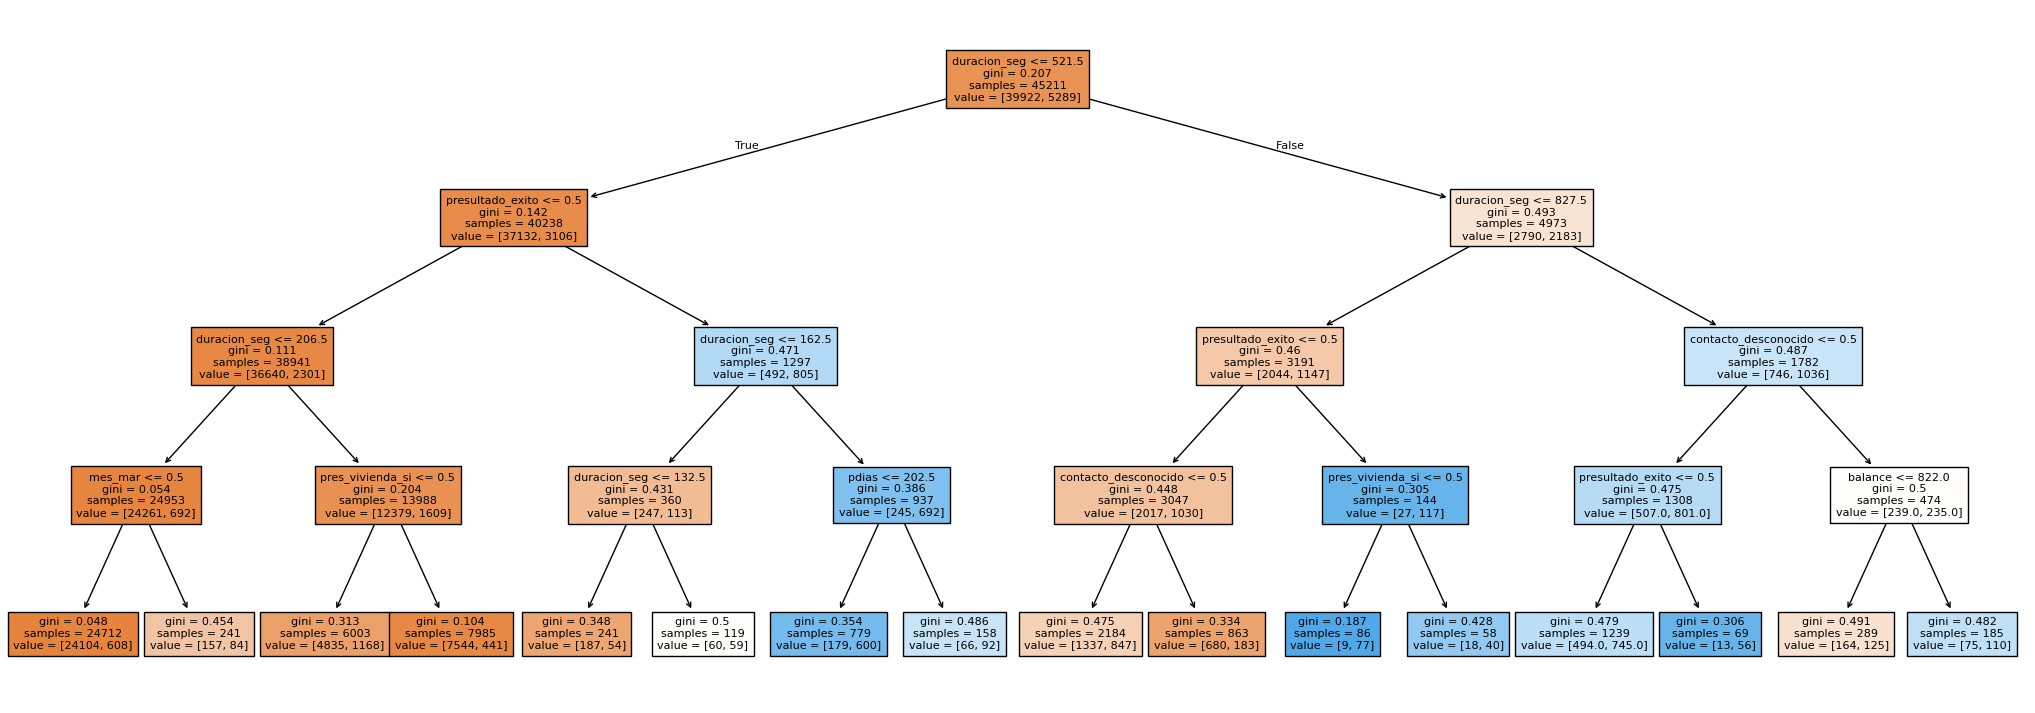

In [34]:
plt.figure(figsize=(26, 9))
plot_tree(decision_tree=model, feature_names=covariables.columns, filled=True, fontsize=8);

 ## 5. Evaluacion de prediccion

In [37]:
y_pred = model.predict(covariables)
df['y_pred'] = y_pred

In [38]:
df.sample(10)[['y_si','y_pred']]

,y_si,y_pred
12880,False,False
43671,True,True
2003,False,False
15297,False,False
11507,True,True
35130,False,False
6920,False,False
5755,False,False
37451,False,False
11199,False,False


In [40]:
(df['y_si'] == df['y_pred']).mean()

0.9021698259273185

In [45]:
len(df[ df['y_si']!= df['y_pred'] ]) ## en 4423 datos falla el algoitmo

4423